In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [116]:
data = pd.read_csv('./data/adult.csv')
df = data.copy()
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [118]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [119]:

unknown_val = '?'
count_per_column = df.apply(lambda col: col.value_counts().get(unknown_val, 0))
count_per_column

df['workclass'] = df['workclass'].str.replace('?', 'Private', regex=False)
df['occupation'] = df['occupation'].str.replace('?', 'Prof-speciality', regex=False)
df['native.country'] = df['native.country'].str.replace('?', 'United-States', regex=False)


In [120]:
df.education= df.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
df.education = df.education.replace('HS-grad', 'high school')
df.education = df.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
df.education = df.education.replace('Bachelors', 'undergrad')
df.education = df.education.replace('Masters', 'grad')
df.education = df.education.replace('Doctorate', 'doc')

In [121]:
#martial status
df['marital.status']= df['marital.status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
df['marital.status']= df['marital.status'].replace(['Never-married'], 'not-married')
df['marital.status']= df['marital.status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education.num'}>,
        <Axes: title={'center': 'capital.gain'}>],
       [<Axes: title={'center': 'capital.loss'}>,
        <Axes: title={'center': 'hours.per.week'}>]], dtype=object)

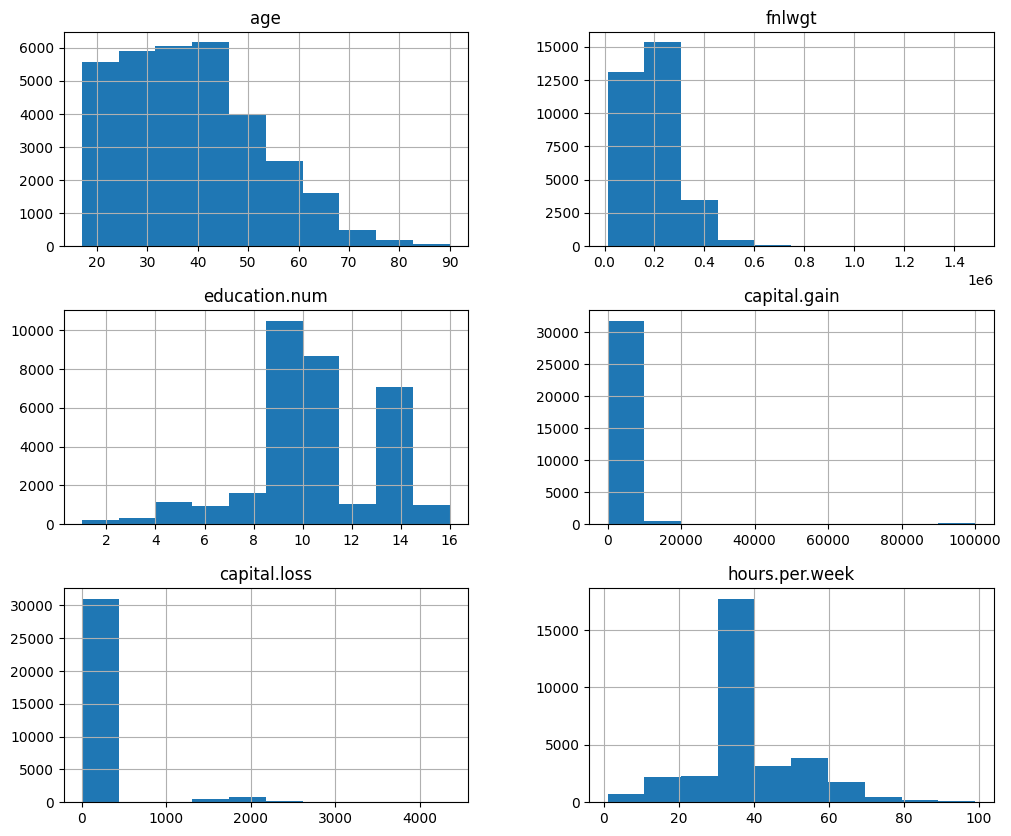

In [122]:
df.hist(figsize=[12, 10])

<Axes: >

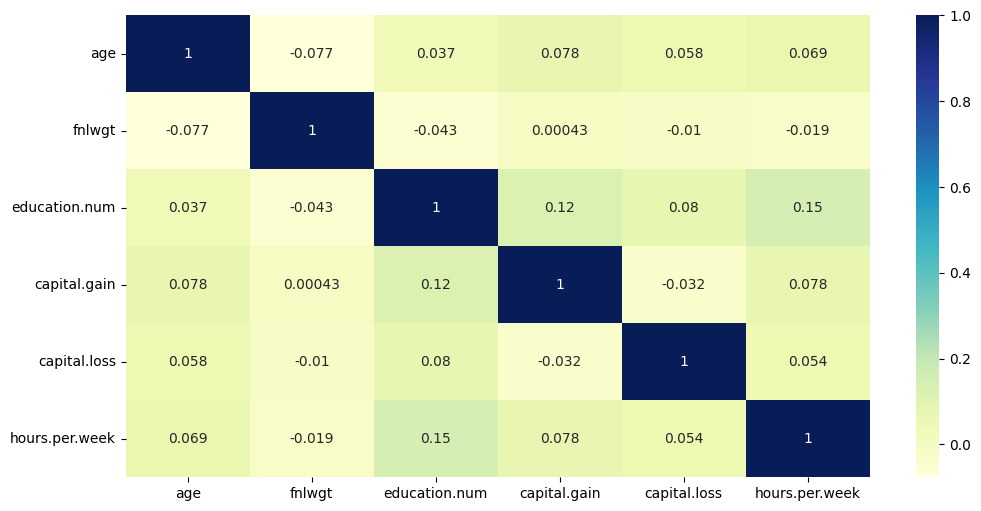

In [123]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=[12, 6])
sns.heatmap(numeric_df.corr(), annot = True, cmap='YlGnBu')

In [124]:
numeric_cols = numeric_df.columns
df[numeric_cols] = (df[numeric_cols] - df[numeric_cols].min()) / (df[numeric_cols].max() - df[numeric_cols].min())
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,1.000000,Private,0.043987,high school,0.533333,other,Prof-speciality,Not-in-family,White,Female,0.0,1.000000,0.397959,United-States,<=50K
1,0.890411,Private,0.081896,high school,0.533333,other,Exec-managerial,Not-in-family,White,Female,0.0,1.000000,0.173469,United-States,<=50K
2,0.671233,Private,0.118021,higher,0.600000,other,Prof-speciality,Unmarried,Black,Female,0.0,1.000000,0.397959,United-States,<=50K
3,0.506849,Private,0.086982,school,0.200000,other,Machine-op-inspct,Unmarried,White,Female,0.0,0.895317,0.397959,United-States,<=50K
4,0.328767,Private,0.171404,higher,0.600000,other,Prof-specialty,Own-child,White,Female,0.0,0.895317,0.397959,United-States,<=50K


In [125]:
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country'], dtype=int)

In [126]:
df['income'] = df['income'].apply(lambda inc : 1 if inc == ">50K" else 0)
df['income'].value_counts()

income
0    24720
1     7841
Name: count, dtype: int64

In [127]:
cols = list(filter(lambda colname: "_" in colname, df.columns))
cols

['workclass_Federal-gov',
 'workclass_Local-gov',
 'workclass_Never-worked',
 'workclass_Private',
 'workclass_Self-emp-inc',
 'workclass_Self-emp-not-inc',
 'workclass_State-gov',
 'workclass_Without-pay',
 'education_doc',
 'education_grad',
 'education_high school',
 'education_higher',
 'education_school',
 'education_undergrad',
 'marital.status_married',
 'marital.status_not-married',
 'marital.status_other',
 'occupation_Adm-clerical',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupation_Prof-speciality',
 'occupation_Prof-specialty',
 'occupation_Protective-serv',
 'occupation_Sales',
 'occupation_Tech-support',
 'occupation_Transport-moving',
 'relationship_Husband',
 'relationship_Not-in-family',
 'relationship_Other-relative',
 'relationship_Own-child',
 'relationship_Unmarr

In [128]:
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [129]:
weis = np.zeros(X_train.shape[1])
bias = 0
alpha = 0.02

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

loss = np.zeros(1000)
m = X_train.shape[0]

for i in range(1000):  # number of epochs
    linear_model = np.dot(X_train, weis) + bias
    y_predicted = sigmoid(linear_model)

    loss[i] = -np.mean(y_train * np.log(y_predicted) + (1 - y_train) * np.log(1 - y_predicted))
    
    dw = (1 / m) * np.dot(X_train.T, (y_predicted - y_train))
    db = (1 / m) * np.sum(y_predicted - y_train)
    
    weis -= 0.01 * dw  # 0.01 is the learning rate
    bias -= 0.01 * db


In [130]:
y_pred = sigmoid(np.dot(X_test, weis) + bias)  >= 0.5
y_pred

array([False, False, False, ..., False, False, False])

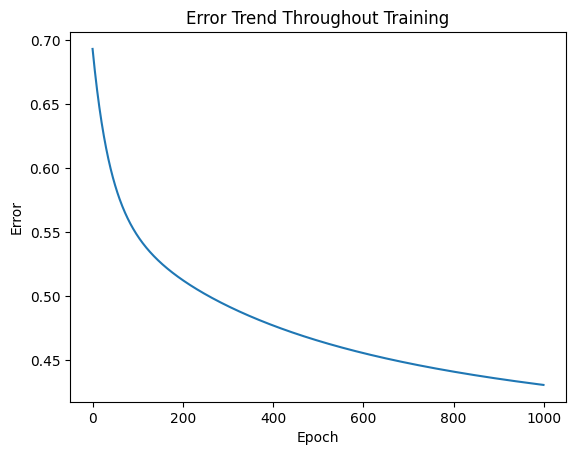

In [131]:
plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error Trend Throughout Training')
plt.show()

In [132]:
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7805695142378559
